In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [2]:
df = sns.load_dataset('tips')

In [3]:
df2 = sns.load_dataset('titanic')

<Axes: >

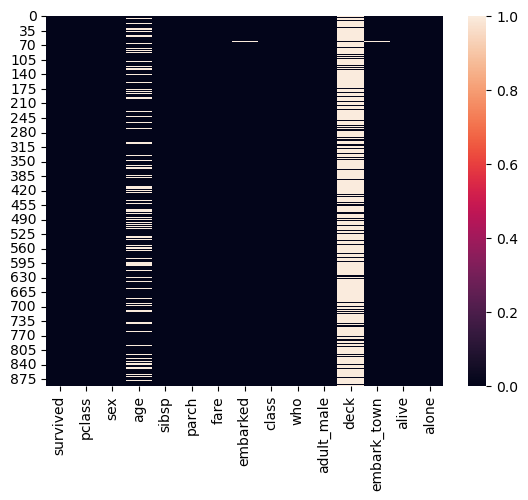

In [6]:
sns.heatmap(df2.isnull())

## basic plots, mean, median etc with sample dataset on sns

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
np.mean(df['total_bill'])

19.78594262295082

In [5]:
np.median(df['total_bill'])

17.795

<Axes: xlabel='total_bill'>

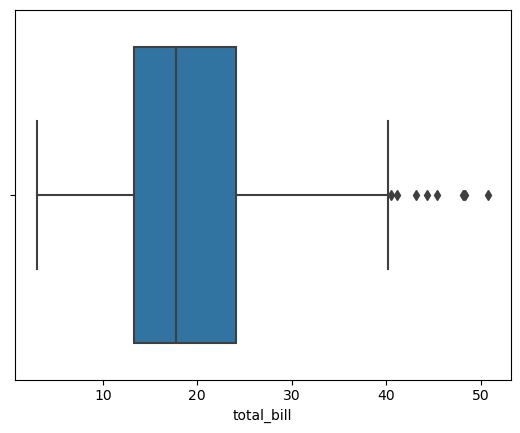

In [14]:
sns.boxplot(x = df['total_bill'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

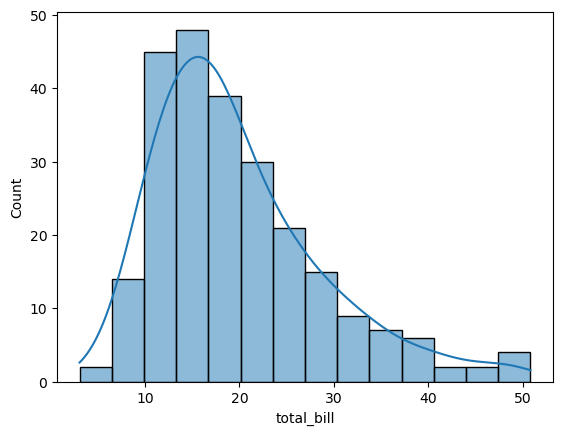

In [16]:
sns.histplot(df['total_bill'], kde = True)

# Kernel Density Estimation is a non-parametric way to estimate the probability density function of a continuous random variable. 
# Essentially, KDE is a way to create a smooth curve that represents the distribution of the data points.

In [17]:
df1 = sns.load_dataset('iris')

In [18]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

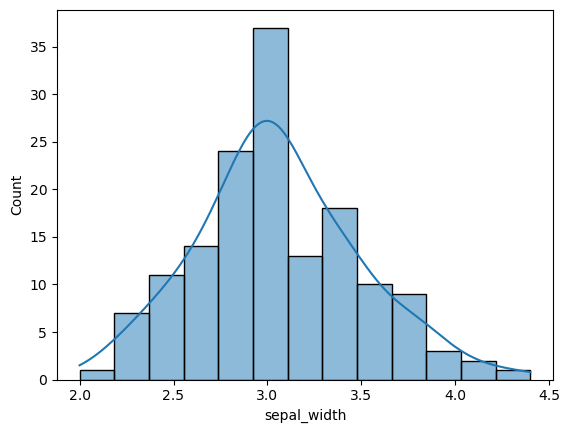

In [21]:
sns.histplot(df1['sepal_width'],kde = True)

In [24]:
np.percentile(df1['sepal_width'],[25,50,75,99]) #gives 25percentile, 50, 75 and 99

array([2.8  , 3.   , 3.3  , 4.151])

#### Outliers : Using Z-score find the outlier values in the 'sepal_width' dataset

In [25]:
# import numpy as np
# import matplotlib as plt
# %matplotlib inline 

In [27]:
# defining function to detect outliers using z-score
def detect_outliers_using_Zscore(data):
    outliers = [] #this list will contain our outliers
    threshold = 3 # ie; beyond 3rd SD is outlier in a normal distribution since 1SD = 68%, 2SD=95%, 3SD=99.7%
    mean = np.mean(data)
    sd = np.std(data)
    
    for i in data:
        z = (i-mean)/sd
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers

In [28]:
data = list(df1['sepal_width'])

detect_outliers_using_Zscore(data)

[4.4]

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

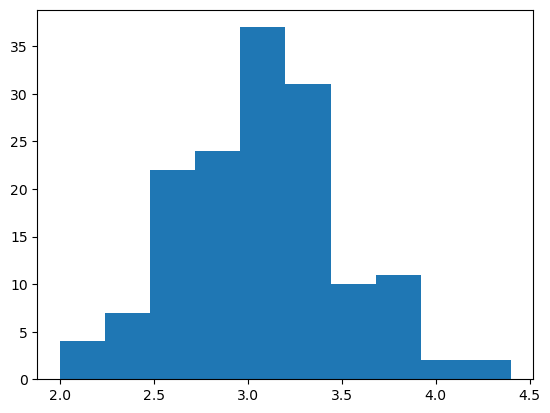

In [31]:
plt.hist (data)

#### Find outliers using IQR

In [43]:
def find_outliers_using_IQR(data):
    outliers = []
    
    #1 - sort the dataset
    data.sort()  # this is inplace sorting. if we dont want inplace we can use sorted_data = sorted(data)
    
    #2 - find Index Q1, VQ1
    #3 - find Index Q3, VQ3
    VQ1,VQ3 = np.percentile(data,[25,75])
    
    #4 - find IQR = VQ3 - VQ1
    IQR = VQ3-VQ1
    
    #5 LF = VQ1 - 1.5(IQR)
    LF = VQ1 - 1.5*(IQR)
    
    #6 UP = VQ3 + 1.5(IQR)
    HF = VQ3 + 1.5*(IQR)
    
    #7 Outliers = Population - Range[LF,UF]
    for i in data:
        if i < LF or i > HF:
            outliers.append(i)
    return outliers
    

In [44]:
find_outliers_using_IQR(data)

[2.0, 4.1, 4.2, 4.4]

<Axes: >

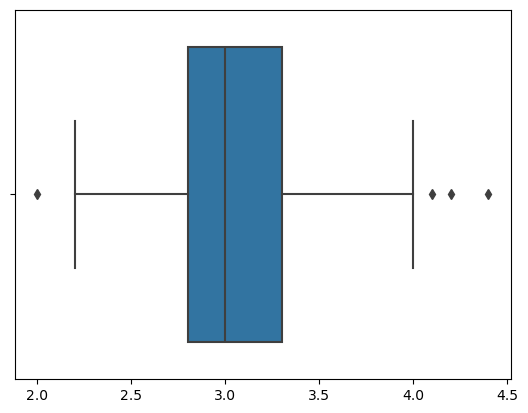

In [46]:
sns.boxplot(x=data)

In [7]:
### working on titanic dataset

In [8]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

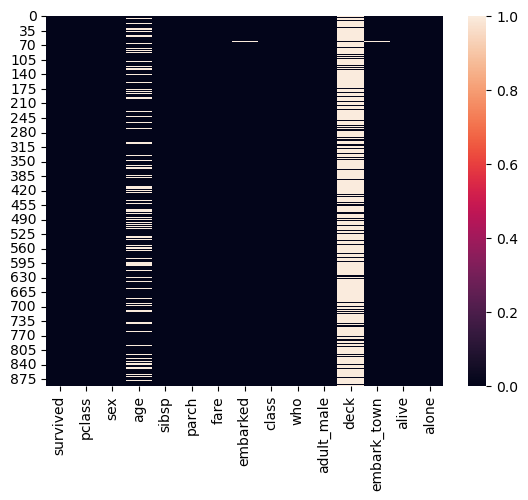

In [9]:
sns.heatmap(df2.isnull())

/var/folders/zj/xp8_rt492ds64h92_r2qgq9h0000gn/T/ipykernel_4077/3499536833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['age'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

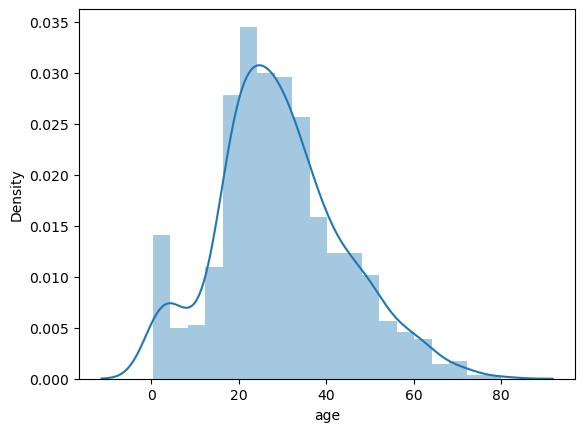

In [11]:
sns.distplot(df2['age'])

In [13]:
df2['age'] = df2['age'].fillna(df2['age'].mean())

<Axes: >

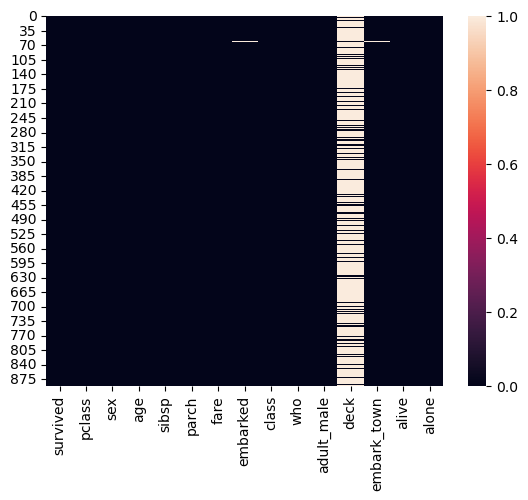

In [16]:
sns.heatmap(df2.isnull())

In [23]:
df2['age'].isnull().value_counts()

age
False    891
Name: count, dtype: int64

In [25]:
df2[df2['age'].isnull()==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [29]:
from sklearn.datasets import make_classification

In [ ]:
# use shift+Tab for signature
make_classification